In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

ModuleNotFoundError: No module named 'statsmodels'

In [3]:
import pandas as pd
df = pd.read_csv('Indian_housing_Delhi_data.csv')
df.head(15)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished
5,3 BHK Apartment,750 sq ft,DLF Farms,Delhi,28.488153,77.156975,11000,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,Well designed 3 bhk multistorey apartment is a...,No Deposit,Semi-Furnished
6,3 BHK Independent Floor,"1,300 sq ft",laxmi nagar,Delhi,28.635509,77.269661,20000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 3 bhk builder floor situated in laxmi...,No Deposit,Furnished
7,3 BHK Independent Floor,"1,200 sq ft",Swasthya Vihar,Delhi,28.641640,77.284027,35000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,Well designed 3 bhk builder floor is available...,No Deposit,Furnished
8,3 BHK Independent House,"1,100 sq ft",Janakpuri,Delhi,28.621193,77.091026,39000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,A spacious 3 bhk independent house is availabl...,No Deposit,Semi-Furnished
9,4 BHK Independent Floor,"2,500 sq ft",Pitampura,Delhi,28.696100,77.125694,90000,INR,4.0,NaN,NaN,NaN,Posted 2 months ago,A spacious 4 bhk builder floor is available fo...,No Deposit,Semi-Furnished


In [4]:
df.shape

(5000, 16)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   str    
 1   house_size        5000 non-null   str    
 2   location          5000 non-null   str    
 3   city              5000 non-null   str    
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   str    
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    str    
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   str    
 13  description       4715 non-null   str    
 14  SecurityDeposit   5000 non-null   str    
 15  Status            5000 non-null   str    
dtypes: float64(5), int64(1), str(10)
memory usage: 625.1 

In [7]:
def preproc_str(s):
    return int(s.strip().replace(',', '').replace('No Deposit','0').replace(' sq ft',''))

In [8]:
preproc_str('1,020 sq ft')
preproc_str('No Deposit')

0

In [9]:
df.house_size = df.house_size.apply(preproc_str)

In [10]:
df.SecurityDeposit = df.SecurityDeposit.apply(preproc_str)

In [11]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",0,Furnished
1,1 RK Studio Apartment,400,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,0,Furnished
2,2 BHK Independent Floor,500,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",0,Semi-Furnished
3,3 BHK Independent House,1020,Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,0,Furnished
4,2 BHK Apartment,810,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,0,Unfurnished


In [22]:
ohe = OneHotEncoder()

In [23]:
ohe.fit(df[['Status']])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'error'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_catego

In [24]:
pd.DataFrame(ohe.transform(df[["Status"]],).toarray(),columns = ['Furnished', 'Semi-Furnished', 'Unfurnished'])

,Furnished,Semi-Furnished,Unfurnished
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
4995,0.0,0.0,1.0
4996,0.0,0.0,1.0
4997,0.0,0.0,1.0
4998,0.0,0.0,1.0


In [25]:
desc = df.describe(include='all')
desc

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
count,5000,5000.000000,5000,5000,5000.000000,5000.000000,5.000000e+03,5000,4975.000000,2737.000000,179,0.0,5000,4715,5.000000e+03,5000
unique,28,NaN,288,1,NaN,NaN,NaN,1,NaN,NaN,1,NaN,52,3820,NaN,3
top,3 BHK Independent Floor,NaN,Defence Colony,Delhi,NaN,NaN,NaN,INR,NaN,NaN,Negotiable,NaN,Posted a year ago,Its three bhk builder floor in the super locat...,NaN,Unfurnished
freq,1567,NaN,189,5000,NaN,NaN,NaN,5000,NaN,NaN,179,NaN,1045,24,NaN,2342
mean,NaN,2982.885400,NaN,NaN,28.578012,77.174499,2.221738e+05,NaN,2.918593,1.954330,NaN,NaN,NaN,NaN,6.569098e+05,NaN
std,NaN,2168.663368,NaN,NaN,0.190186,0.115636,2.739843e+05,NaN,1.087823,0.547219,NaN,NaN,NaN,NaN,9.879070e+05,NaN
min,NaN,150.000000,NaN,NaN,20.011379,72.771332,3.000000e+03,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,1100.000000,NaN,NaN,28.544489,77.138248,2.950000e+04,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN
50%,NaN,2500.000000,NaN,NaN,28.569295,77.196472,1.250000e+05,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,3.600000e+04,NaN
75%,NaN,5896.000000,NaN,NaN,28.618687,77.228950,3.011020e+05,NaN,4.000000,2.000000,NaN,NaN,NaN,NaN,1.012010e+06,NaN


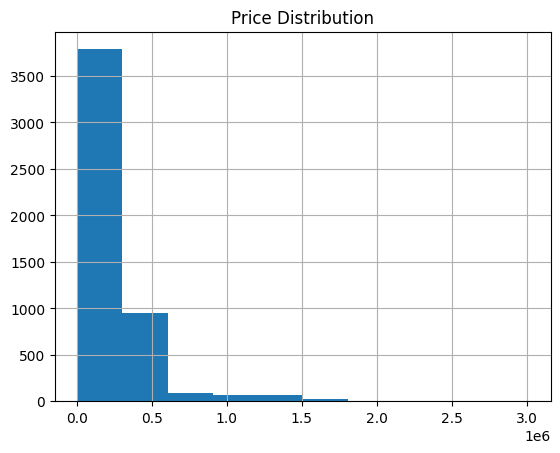

In [26]:
df['price'].hist()
plt.title("Price Distribution")
plt.show()